# Xarray practicals
***Data analysis for geosciences with python***

*Atelier Numérique de l'OMP*

# **Part I: Introduction to xarray objects**
In this part we will open a file containing ocean data and explore it.

### **Question 1.1**
Import xarray using the xr alias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import cartopy.crs as ccrs
# write your answer here
import xarray as xr

### **Question 1.2**
Open the file `../data/GLORYS_ocean-temp-currents_1993-2019.nc`

This file is quite big so this might take some time. If the file is too big and you encounter a memory error, open the smaller file `../data/GLORY-small_ocean-temp-currents_1993-2016.nc` instead.

In [4]:
# write your answer here

# ds = xr.open_dataset("../data/GLORYS-small_ocean-temp-currents_1993-2016.nc")
ds = xr.open_dataset("../data/GLORYS_ocean-temp-currents_1993-2019.nc")
ds

<xarray.Dataset>
Dimensions:    (depth: 13, latitude: 157, time: 312, longitude: 265)
Coordinates:
  * depth      (depth) float32 13.47 15.81 18.5 21.6 ... 55.76 65.81 77.85 92.33
  * latitude   (latitude) float32 -5.0 -4.917 -4.833 -4.75 ... 7.833 7.917 8.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2018-12-16T12:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... -158.2 -158.1 -158.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

### **Question 1.3**
Create a new variable `current_speed` in the dataset, which corresponds to the current speed.
The current speed is the norm of the current velocity, which is obtained with the following formula:

$$
current\ speed = \sqrt{u\ current^2+v\ current^2}
$$

In [5]:
# write your answer here 

v_current = ds.vo
u_current = ds.uo
current_speed = np.sqrt(v_current**2 + u_current**2)
ds['current_speed'] = current_speed

### **Question 1.4**
Select the data at latitude 1°S and longitude 176°W. 

Note that the latitude is positive towards the North and the longitude is positive towards the East.


In [6]:
# write your answer here 

ds.sel(latitude=-1, longitude=-176.0)

<xarray.Dataset>
Dimensions:        (depth: 13, time: 312)
Coordinates:
  * depth          (depth) float32 13.47 15.81 18.5 21.6 ... 65.81 77.85 92.33
    latitude       float32 -1.0
  * time           (time) datetime64[ns] 1993-01-16T12:00:00 ... 2018-12-16T1...
    longitude      float32 -176.0
Data variables:
    vo             (time, depth) float32 -0.02869 -0.02625 ... 0.01404 0.06897
    thetao         (time, depth) float32 ...
    uo             (time, depth) float32 -0.2448 -0.2466 ... -0.3186 -0.2905
    current_speed  (time, depth) float32 0.2464 0.248 0.2507 ... 0.3189 0.2986
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

### **Question 1.5**:

Save the data selected in Question 1.4 as a new netcdf file.

In [7]:
# write your answer here

ds.sel(latitude=-1, longitude=-176.0).to_netcdf('extracted_data.nc')

---------------------------
# **Part II: Plotting**
In this part we start by some plotting examples before diving into xarray's computing capacities.

### **Question 2.1**
To visualize our dataset, select the data at the latitude 1°S and at the first time step. Plot the ocean temperature (variable `thetao`) using depth as the y-axis and longitude as the x-axis.
You can try the `magma` colormap and a `contourf` plot.

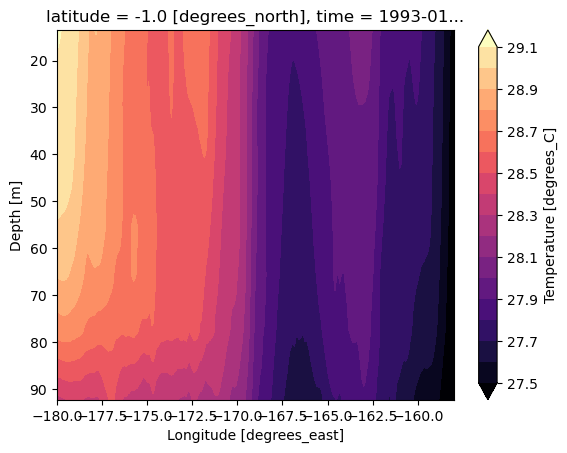

In [8]:
# write your answer here 
data = ds.thetao.sel(latitude=-1).isel(time=0)
data.plot.contourf(yincrease=False,cmap='magma',
                   levels=20, robust=True)

### **Question 2.2**
Select the first depth and time step and plot the current speed (as computed in part I).

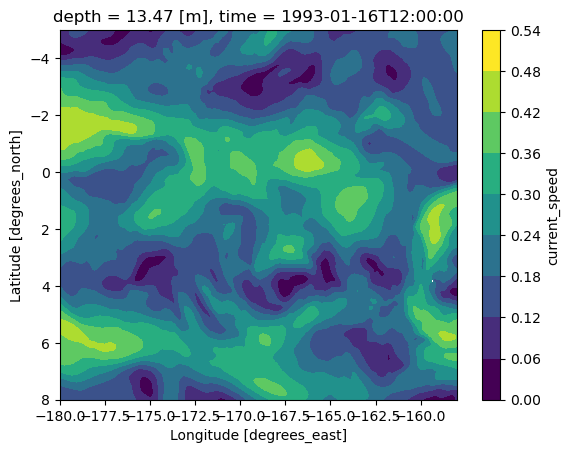

In [9]:
# write your answer here 
data = ds.current_speed.isel(time=0, depth=0)
data.plot.contourf(x='longitude', y='latitude', yincrease=False, levels=10)

### **Question 2.3**
Plot a histogram of all North-South current speed (variable `vo`)

(array([5.7800000e+02, 1.1979000e+04, 1.6098500e+05, 2.2366720e+06,
        3.5723443e+07, 9.5382545e+07, 3.1360284e+07, 3.5862830e+06,
        2.6648600e+05, 1.0953000e+04]),
 array([-0.5847346 , -0.4757225 , -0.3667104 , -0.25769827, -0.14868616,
        -0.03967404,  0.06933807,  0.17835018,  0.2873623 ,  0.3963744 ,
         0.50538653], dtype=float32),
 <BarContainer object of 10 artists>)

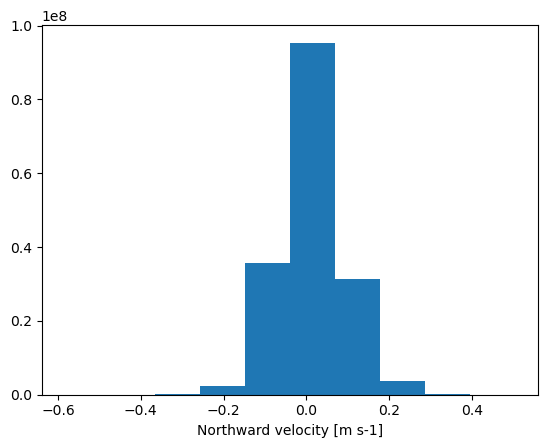

In [10]:
# write your answer here 
ds.vo.plot()

### **Question 2.4**:
Select the 3rd time step and plot maps of the ocean temperature at all depth using the keywords `col`. You can also use `col_wrap=n` to create a new line every `n` subplot.

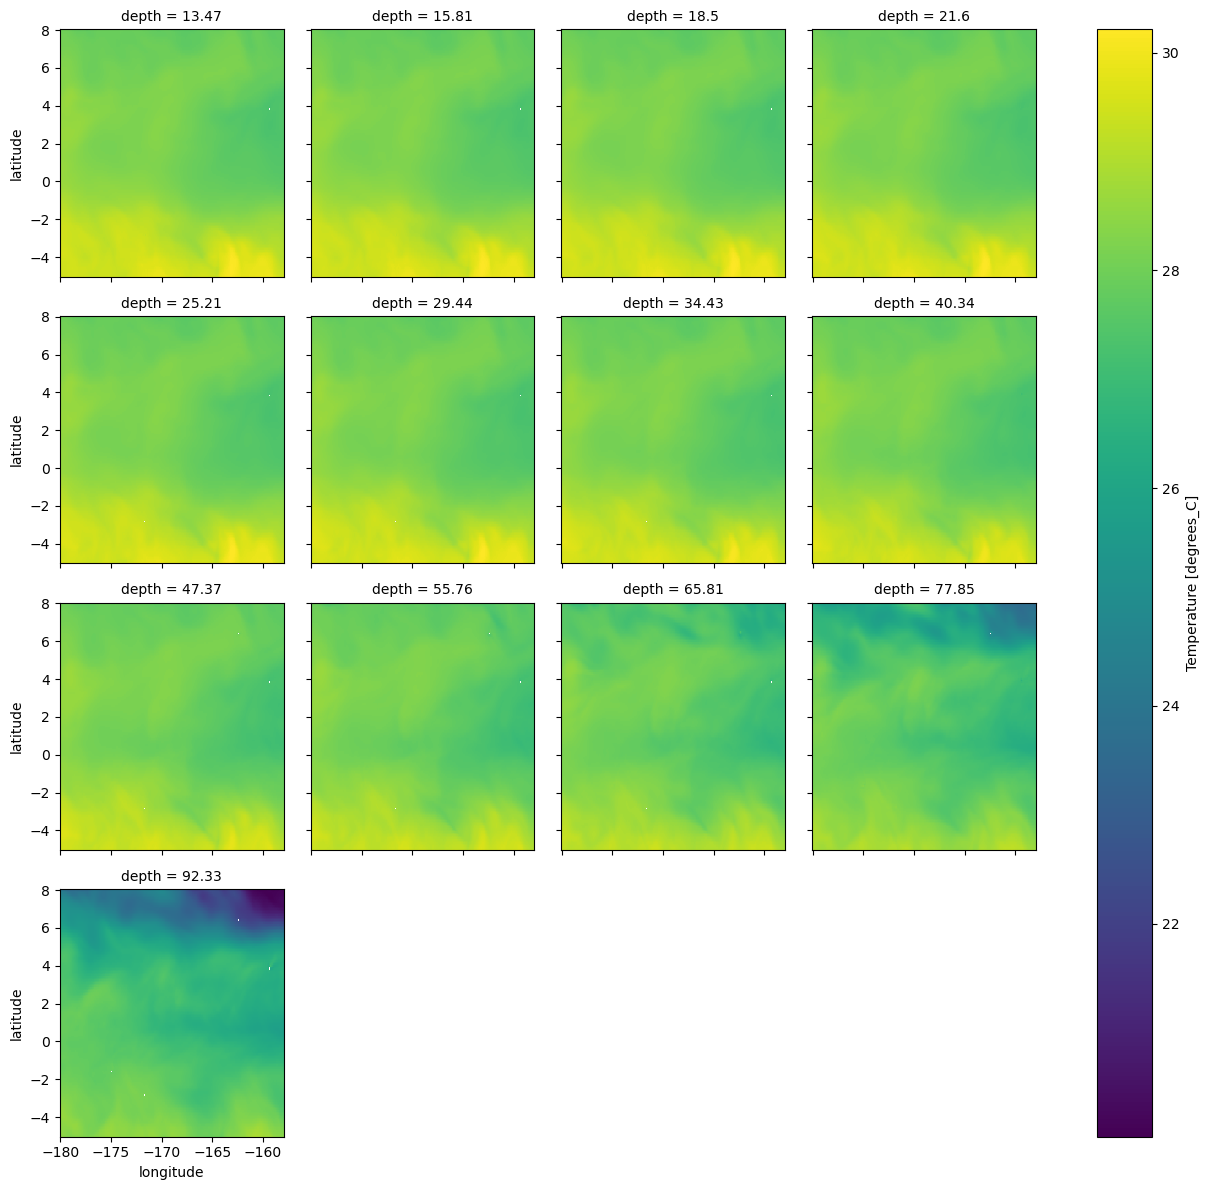

In [11]:
# write your answer here 

ds.isel(time=3).thetao.plot(col='depth',col_wrap=4)

### <span style="color:red">**Question 2.5**:</span>
<span style="color:red">*More open question*</span>

Select one of the depths of the data selected in question 2.4 and plot it on a cartopy map. 

You can use 

- `ax.set_extent((lon_min, lon_max, lat_min, lat_max))` to set the boudaries of the plot.
- `ax.coastlines()` to plot the coastlines
- `ax.set_global()` ti show the full globe.

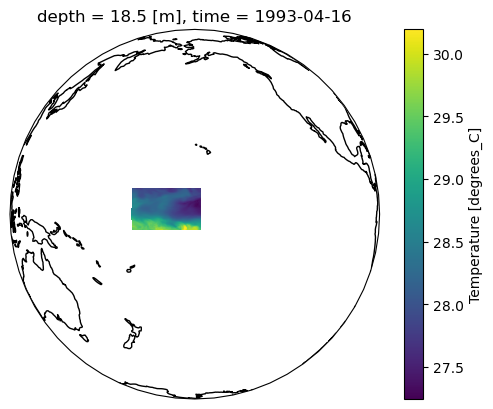

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.Orthographic(200)})
ds.isel(time=3, depth=2).thetao.plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

---------------------------
# **Part III: First analyses**
In this part, we will make operations on the ocean dataset and extract information from it.

### **Question 3.1**:
Compute the global mean (along longitude and latitude) of the temperature of the ocean.

Plot the results either using a 2D plot or multiple line plots using the keyword `hue`. 

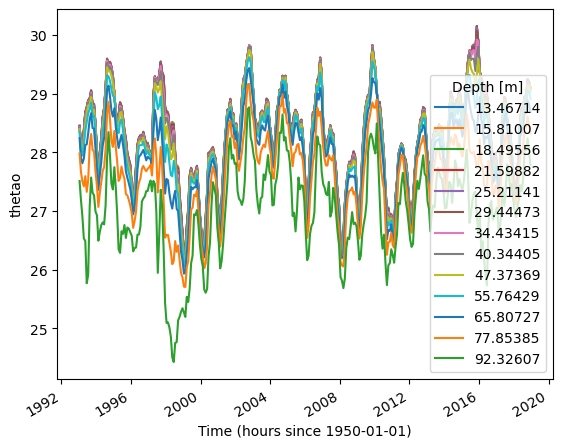

In [12]:
# write your answer here
global_mean_temp = ds.thetao.mean(['longitude','latitude'])
global_mean_temp.plot(hue='depth');

### **Question 3.2**:
Get the current speed data from July 2004 and the depth closest to 50m.
Plot the results.

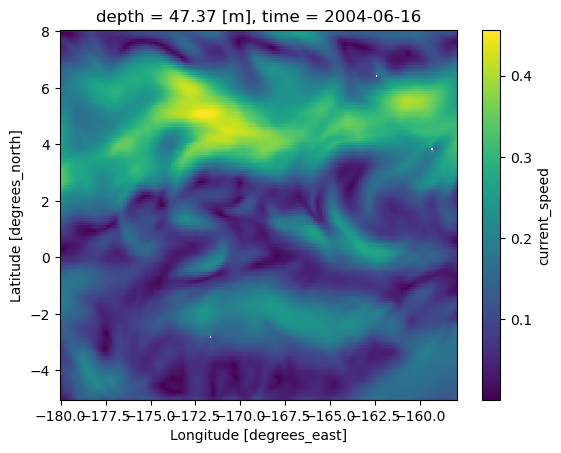

In [13]:
# write your answer here
ds.sel(time='2004-07',  depth=50, method='nearest').current_speed.plot()

### **Question 3.3**:
Compute the mean East-West (variable `uo`) current over depth.

In [14]:
# write your answer here
current_mean = ds.uo.mean('depth')

### **Question 3.4**:
Select the data at the surface (first depth level) and compute the global mean temperature data where the mean East-West current (computed in question 3.4) is stronger than $0.2m\ s^{-1}$. Plot  time series of the results.

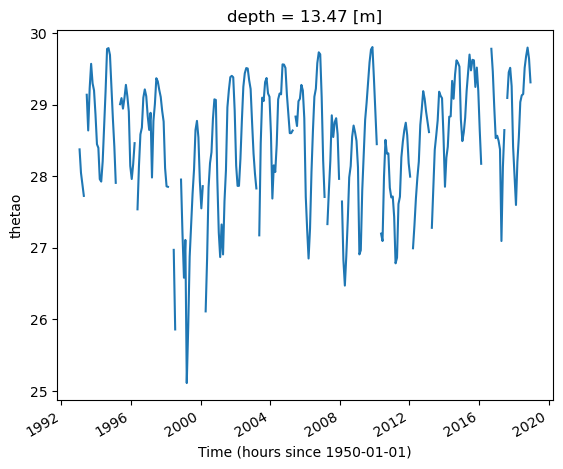

In [16]:
# write your answer here
ds_surface = ds.isel(depth=0)
thetao_surface_masked = ds_surface.thetao.where(current_mean>0.4) 
thetao_surface_masked_global_mean = thetao_surface_masked.mean(['longitude','latitude'])
thetao_surface_masked_global_mean.plot()

### **Question 3.5**
There are missing data in the results. Fill the gaps using a cubic interpolation. Compare it with the total global mean temperature at the surface computed in question 3.1.

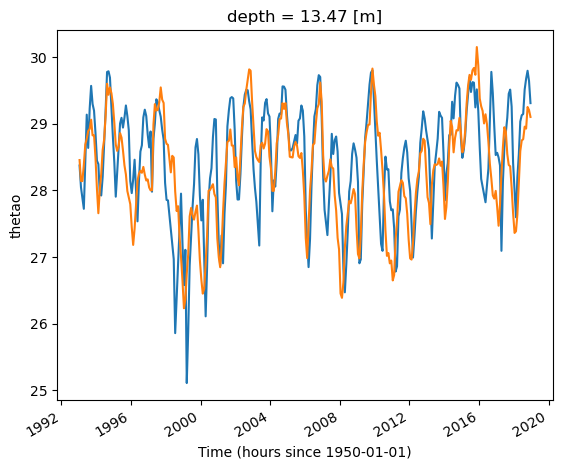

In [17]:
# write your answer here

thetao_surface_masked_global_mean.interpolate_na('time').plot()
global_mean_temp.isel(depth=0).plot()

### **Question 3.6**

Compute the climatology of the north-south current data. A climatology is the average yearly cycle of a given variable (here the temperature) : for each month (1 to 12), the mean value over each year in the dataset is computed. It quantifies what a "mean month" of January (for instance) looks like.

The climatology can be computed using `groupby` and temporal information.

In [103]:
# write your answer here

climatology = ds.uo.groupby('time.month').mean()

### **Question 3.7**

Compute the global average climatology. Plot the climatology using `contourf`.

**BONUS**
Compute the **weighted**  global average climatology by using the cosine of the latitude as weights. This is proportional to the cell areas in this case. The weights can be obtained with `weights=np.cos(np.deg2rad(ds.latitude))`

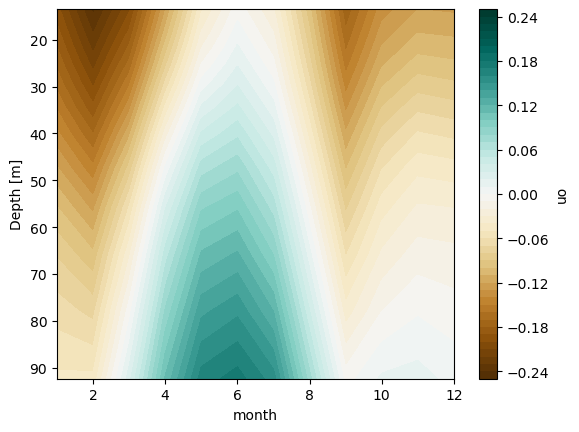

In [116]:
# write your answer here

climatology_global_mean = climatology.mean(['longitude','latitude'])
climatology_global_mean.plot.contourf(x='month', y='depth', 
                                      yincrease=False, levels=50,
                                     cmap='BrBG')

weights=np.cos(np.deg2rad(ds.latitude))
climatology_global_mean_weighted = climatology.weighted(weights).mean(['longitude','latitude'])

### **Question 3.8**:

Find the month where the mean, vertically integrated, global mean, North-South current is the most negative. 


In [135]:
# write your answer here

result = climatology_global_mean.integrate('depth').idxmin('month')

### <span style="color:red">**Question 3.9**:</span>
<span style="color:red">*More open question*</span>

Multi-point question:
- Resample data by year and compute a yearly average.
- Compute the temporal trend in ocean temperature at all longitude, latitude and depth, using `DataArray.polyfit`. **ATTENTION** xarray gives results in °C/ns, which means you need to multiply the results by the number of nanoseconds per year.
- Get the depth where the strongest trend is detected
- Plot the map of the trend at that depth.
- **BONUS** plot this map using cartopy

In [166]:
ns_in_year = 365.24*24*3600*1_000_000_000
# write your answer here

yearly_data = ds.resample(time='YS').mean()
polyfit = yearly_data.thetao.polyfit('time', deg=1)
trend = polyfit.polyfit_coefficients.sel(degree=1)*ns_in_year
max_trend_per_depth = trend.max(['longitude','latitude'])
depth_where_trend_is_max = max_trend_per_depth.idxmax('depth') 
trend_at_depth_max_trend = trend.sel(depth=depth_where_trend_is_max)

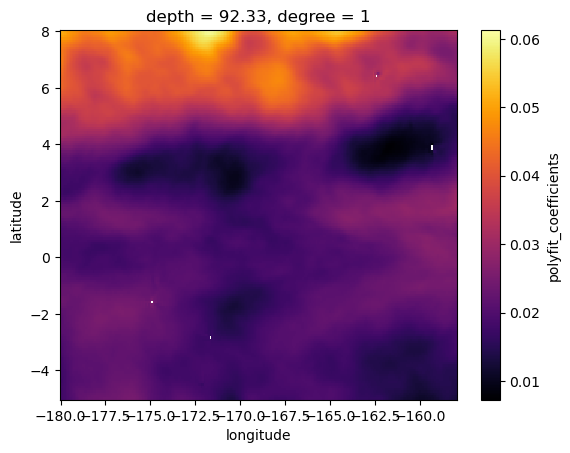

In [167]:
(trend_at_depth_max_trend).plot(cmap='inferno')